# 모듈 임포트 및 데이터 로드

In [1]:
from tqdm.auto import tqdm
import random
import os

import torch

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def reset_seeds(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

reset_seeds()

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [4]:
!pip install -U finance-datareader

In [5]:
import FinanceDataReader as fdr

In [6]:
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,73400,1,100,0.14,73300,73400,73000,1806896,132219963100,438182039170000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,139700,2,-300,-0.21,139000,139900,138900,534180,74407999100,101701930390500,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,424500,1,2500,0.59,429500,430000,423500,41966,17882692000,99333000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,704000,1,1000,0.14,705000,706000,702000,5421,3816837000,50106496000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,59200,2,-100,-0.17,59300,59300,58800,171865,10153893500,48714892640000,822886700,STK


In [7]:
df_kospi = df_krx[df_krx['Market'] == 'KOSPI']
df_kospi

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,73400,1,100,0.14,73300,73400,73000,1806896,132219963100,438182039170000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,139700,2,-300,-0.21,139000,139900,138900,534180,74407999100,101701930390500,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,424500,1,2500,0.59,429500,430000,423500,41966,17882692000,99333000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,704000,1,1000,0.14,705000,706000,702000,5421,3816837000,50106496000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,59200,2,-100,-0.17,59300,59300,58800,171865,10153893500,48714892640000,822886700,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2771,014915,KR7014911002,성문전자우,KOSPI,,7000,1,270,4.01,6760,7000,6760,184,1280800,4200000000,600000,STK
2772,002785,KR7002781003,진흥기업우B,KOSPI,,4850,2,-170,-3.39,4850,4850,4850,1,4850,4157507300,857218,STK
2774,001525,KR7001521004,동양우,KOSPI,,6300,1,150,2.44,6470,6470,6300,511,3306000,3891705300,617731,STK
2776,002787,KR7002782001,진흥기업2우B,KOSPI,,12600,2,-150,-1.18,12600,12600,12600,1,12600,3714580800,294808,STK


# 종목명을 받아 종목코드를 찾아 반환하는 함수

In [8]:
def item_code_by_item_name(item_name):
    """
    종목명을 받아 종목코드를 찾아 반환하는 함수
    """
    item_code_list = df_kospi.loc[df_kospi["Name"] == item_name, "Code"].tolist()
    if len(item_code_list) > 0:
        item_code = item_code_list[0]
        return item_code
    else:
        return "없는 주식입니다 !"

# 종목명을 넘겨주면 일별시세를 반환하는 함수

In [9]:
def find_item_list(item_name, year=2020):
    """
    종목명을 넘겨주면 일별시세를 반환하는 함수
    내부에서 종목명으로 종목코드를 반환하는 함수(item_code_by_item_name)로
    종목의 시세를 수집합니다.
    """

    item_code = item_code_by_item_name(item_name)
    if item_code:
        df_day = fdr.DataReader(item_code, str(year))
        return df_day
    else:
        return False

In [10]:
df = find_item_list("삼성전자", year = 2020)
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921
...,...,...,...,...,...,...
2023-12-12,73300,73500,73100,73500,13758646,0.006849
2023-12-13,73300,73500,72800,72800,13116766,-0.009524
2023-12-14,74100,74300,72500,73100,27567593,0.004121


# 시각화

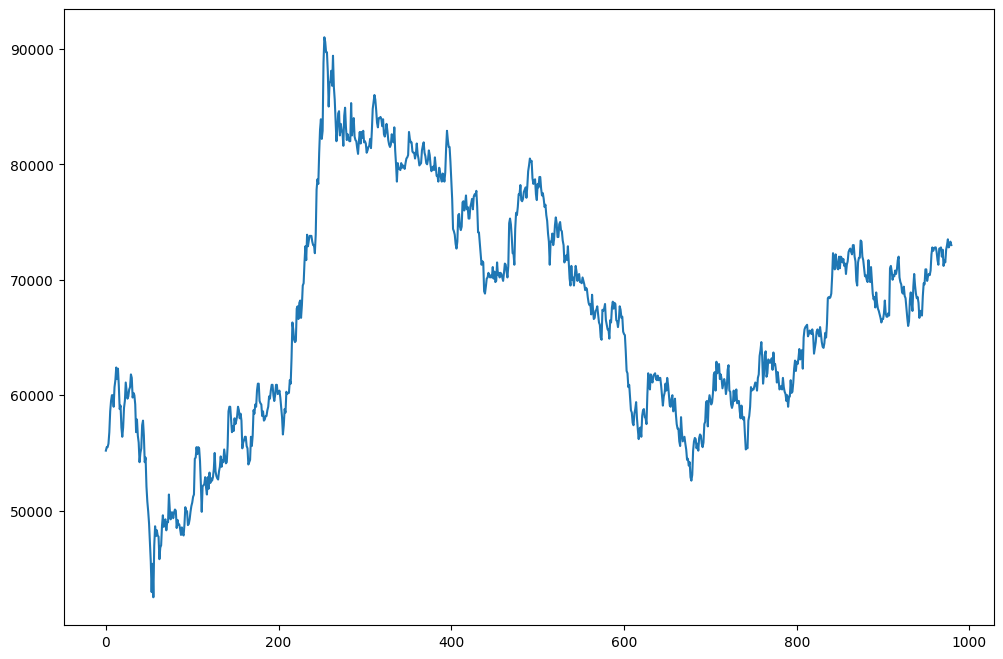

In [11]:
data = df['Close'].values

plt.figure(figsize=(12, 8))
plt.plot(data)
plt.show()

# 스케일링 및 사이즈 변경


In [12]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data = np.array(data).reshape(-1,1)    # 표준화를 하기 위해 사이즈를 (-1,1)로 조정

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(data)
scaled[1]

array([0.26804124])

In [13]:
test_idx = int(len(scaled) * 0.8)

train = scaled[:test_idx]
test = scaled[test_idx:]

In [14]:
df['ds'] = pd.to_datetime(df.index)
df['y'] = df['Close']

In [15]:
df[['ds', 'y']].iloc[:-10]

,ds,y
Date,,
2020-01-02,2020-01-02,55200
2020-01-03,2020-01-03,55500
2020-01-06,2020-01-06,55500
2020-01-07,2020-01-07,55800
2020-01-08,2020-01-08,56800
...,...,...
2023-11-28,2023-11-28,72700
2023-11-29,2023-11-29,72700
2023-11-30,2023-11-30,72800


# 모델 세팅 및 학습, 예측

In [16]:
!pip install pystan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.1 MB/s eta 0:00:00


In [17]:
!pip install prophet

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvlg5gwfc/9j_o17ab.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvlg5gwfc/5e1c735m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30978', 'data', 'file=/tmp/tmpvlg5gwfc/9j_o17ab.json', 'init=/tmp/tmpvlg5gwfc/5e1c735m.json', 'output', 'file=/tmp/tmpvlg5gwfc/prophet_modelzc33m_q5/prophet_model-20231218005939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:59:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:59:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


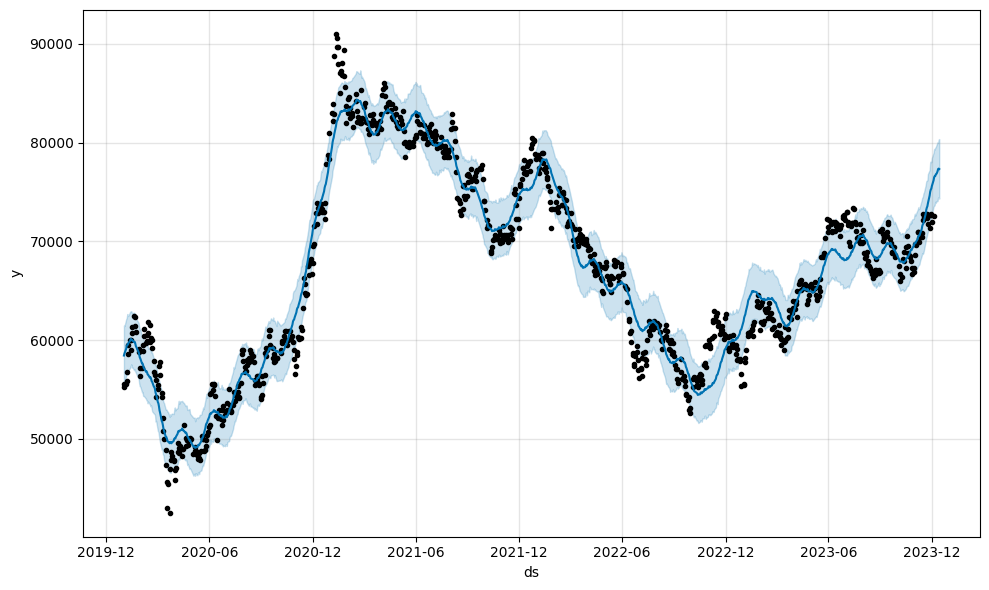

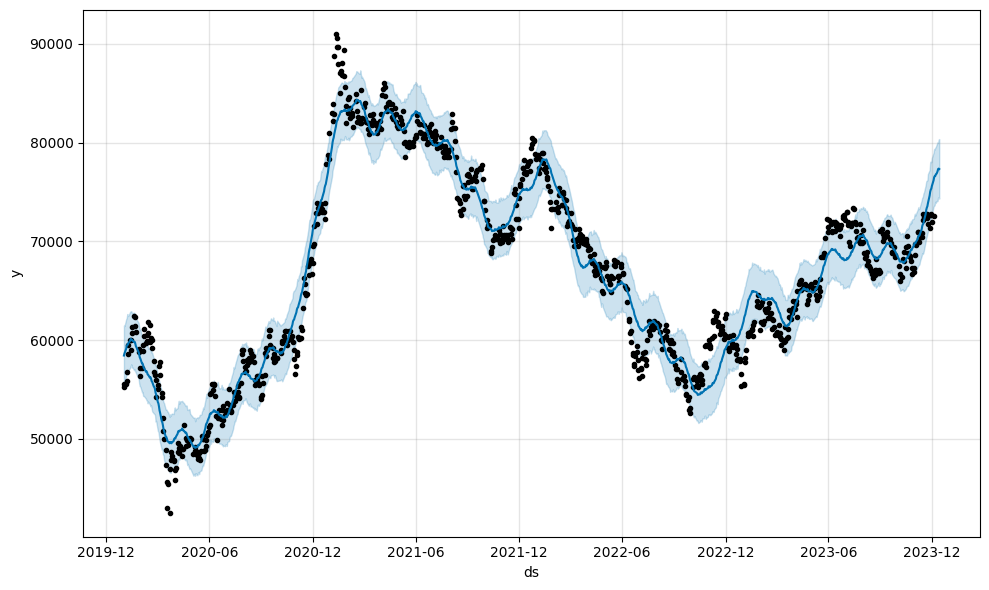

In [18]:
# prophet 모듈 세팅
from prophet import Prophet

# Day 단위로 데이터가 구성되어 있으므로, 일 단위 주기성 활성화
model = Prophet(daily_seasonality=True)

# 데이터 학습 시작 -> 기계학습
model.fit(df[['ds', 'y']].iloc[:-10])

# 주가 예측 위한 날짜 데이터 세팅 -> 기존 데이터 + 향후 14일치 예측값
future = model.make_future_dataframe(periods=10)

# 주가 예측
forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(11)

# 모델이 제공하는 시각화
model.plot(forecast)

In [19]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-02,58426.135551,55478.160653,61473.747473
1,2020-01-03,58638.815290,55646.499910,61407.369426
2,2020-01-06,59114.678152,56371.762700,62105.871428
3,2020-01-07,59411.304632,56587.170752,62250.699151
4,2020-01-08,59521.884425,56621.142011,62631.236174
...,...,...,...,...
975,2023-12-10,76930.511996,74070.243017,79869.798951
976,2023-12-11,77081.257218,74072.751983,80034.266585
977,2023-12-12,77311.762628,74430.881264,79955.848938
978,2023-12-13,77360.925167,74437.273488,80307.639362


In [20]:
model = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality=True,
                 weekly_seasonality=True,
                 daily_seasonality=True,
                 changepoint_prior_scale=0.5)

# 데이터 학습 시작 -> 기계학습
model.fit(df[['ds', 'y']])

# 주가 예측 위한 날짜 데이터 세팅 -> 기존 데이터 + 향후 10일치 예측값
future = model.make_future_dataframe(periods=14)

forecast = model.predict(future)

target_changes = forecast['yhat'].tail(14)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvlg5gwfc/4f77_q1w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvlg5gwfc/sxtfgv46.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13302', 'data', 'file=/tmp/tmpvlg5gwfc/4f77_q1w.json', 'init=/tmp/tmpvlg5gwfc/sxtfgv46.json', 'output', 'file=/tmp/tmpvlg5gwfc/prophet_modeltxty0eid/prophet_model-20231218005941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:59:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:59:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
0,2020-01-02,57164.091533,55058.042099,59310.058555
1,2020-01-03,57368.459359,55157.304680,59561.094483
2,2020-01-06,57832.083546,55745.365904,59924.361976
3,2020-01-07,58062.885241,56025.383790,60084.443610
4,2020-01-08,58159.865841,55864.918699,60279.684287
...,...,...,...,...
989,2023-12-28,71284.190815,69135.037489,73473.880731
990,2023-12-29,71429.842298,69138.565124,73608.028027
991,2023-12-30,61290.929223,59159.463416,63504.731328
992,2023-12-31,61399.308872,59242.717103,63608.310694


In [48]:
df= forecast[['ds','yhat']][600:]
df.rename(columns={'ds': 'x', 'yhat': 'y'}, inplace=True)
df.reset_index(drop=True, inplace=True)
df['x'] = df['x'].dt.strftime('%Y-%m-%d')
df['y'] = df['y'].astype(float)
df['y'] = (df['y'] / 100).round() * 100
json_data = df.to_json(orient='records', date_format='iso')

# JavaScript에서 사용할 수 있는 배열로 변환
js_array = f"const stockData = {json_data};"

print(js_array)

const stockData = [{"x":"2021-03-22","y":81600.0},{"x":"2021-03-23","y":81900.0},{"x":"2021-03-24","y":81900.0},{"x":"2021-03-25","y":82000.0},{"x":"2021-03-26","y":82200.0},{"x":"2021-03-29","y":82800.0},{"x":"2021-03-30","y":83100.0},{"x":"2021-03-31","y":83200.0},{"x":"2021-04-01","y":83400.0},{"x":"2021-04-02","y":83700.0},{"x":"2021-04-05","y":84300.0},{"x":"2021-04-06","y":84700.0},{"x":"2021-04-07","y":84800.0},{"x":"2021-04-08","y":84900.0},{"x":"2021-04-09","y":84900.0},{"x":"2021-04-12","y":84800.0},{"x":"2021-04-13","y":84800.0},{"x":"2021-04-14","y":84600.0},{"x":"2021-04-15","y":84400.0},{"x":"2021-04-16","y":84300.0},{"x":"2021-04-19","y":83800.0},{"x":"2021-04-20","y":83700.0},{"x":"2021-04-21","y":83400.0},{"x":"2021-04-22","y":83100.0},{"x":"2021-04-23","y":83000.0},{"x":"2021-04-26","y":82300.0},{"x":"2021-04-27","y":82100.0},{"x":"2021-04-28","y":81800.0},{"x":"2021-04-29","y":81500.0},{"x":"2021-04-30","y":81400.0},{"x":"2021-05-03","y":80800.0},{"x":"2021-05-04","y

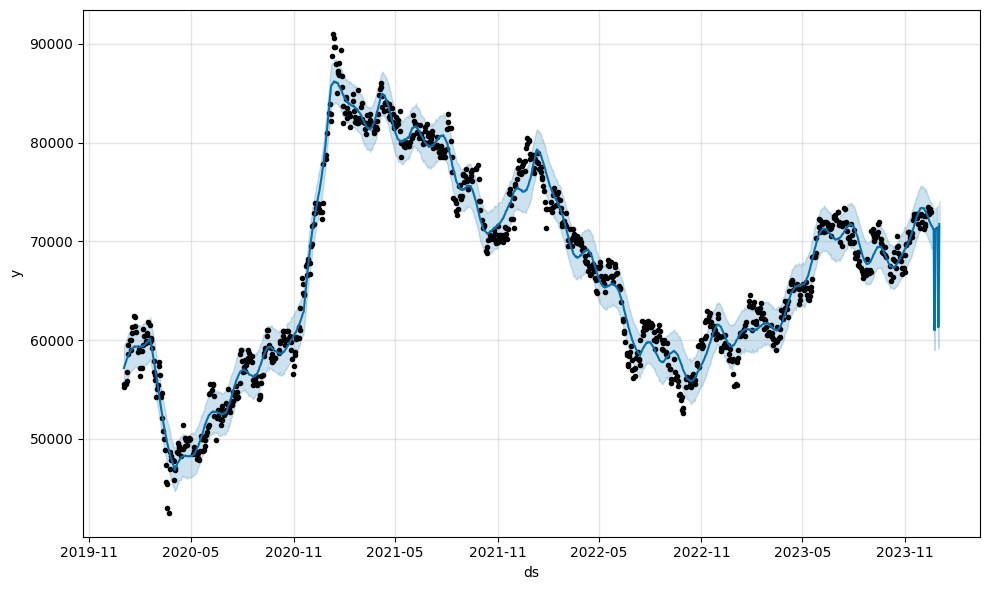

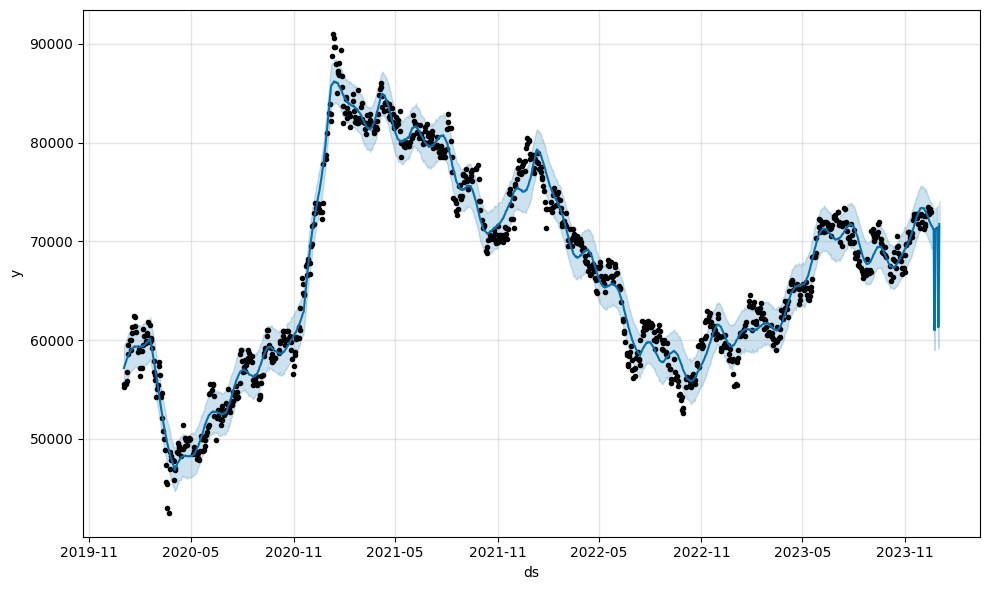

In [21]:
model.plot(forecast)

In [22]:
future_pred = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(14)

# 예측 구성요소 확인

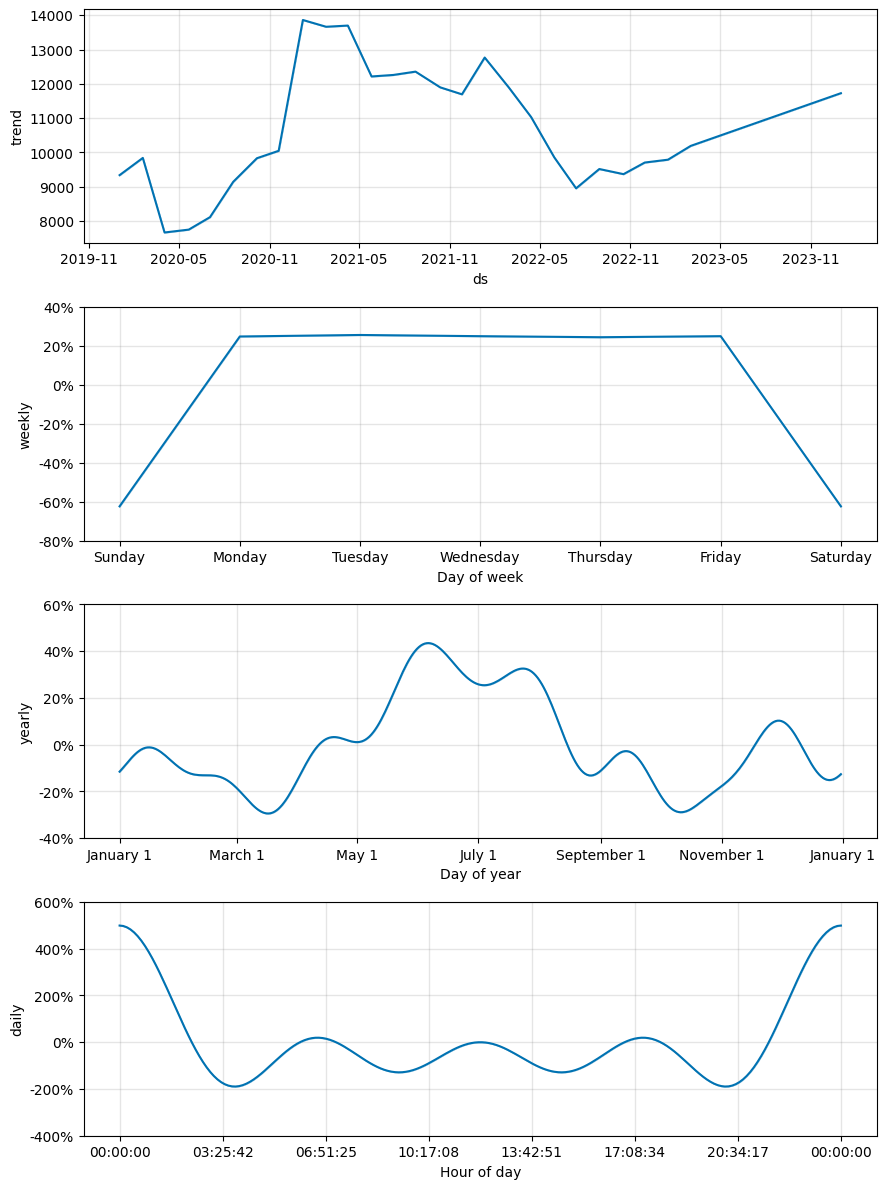

In [23]:
model.plot_components(forecast)
plt.show()